In [188]:
import pandas as pd
import numpy as np

# Observe Values

First, lets take a look at the possible values of each categorical column (with strings)

In [189]:

df = pd.read_csv(r'..\Datasets\training-dataset-reduced.csv')
print("JOB\n", np.unique(df.job.values))
print("MARITAL\n", np.unique(df.marital.values))
print("EDUCATION\n", np.unique(df.education.values))
print("DEFAULT\n", np.unique(df.default.values))
print("HOUSING\n", np.unique(df.housing.values))
print("LOAN\n", np.unique(df.loan.values))
print("CONTACT\n", np.unique(df.contact.values))
print("MONTH\n", np.unique(df.month.values))
print("DAY_OF_WEEK\n", np.unique(df.day_of_week.values))
print("POUTCOME\n", np.unique(df.poutcome.values))
print("SUBSCRIBED\n", np.unique(df.y.values))



JOB
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
MARITAL
 ['divorced' 'married' 'single' 'unknown']
EDUCATION
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
DEFAULT
 ['no' 'unknown' 'yes']
HOUSING
 ['no' 'unknown' 'yes']
LOAN
 ['no' 'unknown' 'yes']
CONTACT
 ['cellular' 'telephone']
MONTH
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
DAY_OF_WEEK
 ['fri' 'mon' 'thu' 'tue' 'wed']
POUTCOME
 ['failure' 'nonexistent' 'success']
SUBSCRIBED
 ['no' 'yes']


In order to take a better decision when encoding, let's see how many missings do we have on those that have missings

In [190]:
s = (df.isin(['unknown']).sum()/len(df) * 100) #Calculation of the proportion of missings of every column
s = s[s != 0] #Removing those features that doesn't have missings
display(pd.DataFrame(s, columns=[''])) #Finally print the result

,
job,0.884956
marital,0.239988
education,4.559772
default,15.464227
housing,2.579871
loan,2.579871


# Encoding

## Label Encoding
Label encoding will be used for those variables that are yes/no or other binaries and those categories that have an implicit order,
in this case, days and months. In the case the binary feautre has "unknown" values, then, if there are few missings (<5%), this label encoding will do. Otherwise, it is better to use one hot encoding, like in the case of the variable "default"

In [191]:
yes_no = {'no': 0,
 'unknown' : 0.5,
 'yes': 1}
contact = {'cellular': 0,
 'telephone': 1}
month = {'jan': 1,
 'feb': 2,
 'mar': 3,
 'apr': 4,
 'may': 5,
 'jun': 6,
 'jul': 7,
 'aug': 8,
 'sep': 9,
 'oct': 10,
 'nov': 11,
 'dec': 12
 }
day_of_week = {'mon': 1,
 'tue': 2,
 'wed': 3,
 'thu': 4,
 'fri': 5,
 'sat': 6,
 'sun': 7
 }
df.contact=df.contact.map(contact)
df.month=df.month.map(month)
df.day_of_week=df.day_of_week.map(day_of_week)
df.y=df.y.map(yes_no)
df.housing=df.housing.map(yes_no)
df.loan=df.loan.map(yes_no)

print("CONTACT\n", np.unique(df.contact))
print("MONTH\n", np.unique(df.month))
print("DAY_OF_THE_WEEK\n", np.unique(df.day_of_week))
print("HOUSING\n", np.unique(df.housing))
print("LOAN\n", np.unique(df.loan))
print("YES/NO\n", np.unique(df.y))

CONTACT
 [0 1]
MONTH
 [ 3  4  5  6  7  8  9 10 11 12]
DAY_OF_THE_WEEK
 [1 2 3 4 5]
HOUSING
 [0.  0.5 1. ]
LOAN
 [0.  0.5 1. ]
YES/NO
 [0. 1.]


## OneHot Encoding

In [192]:

df = pd.get_dummies(df, columns=["job","marital","education","default","poutcome"],drop_first=True)
pd.set_option('display.max_columns', None)
display(df.iloc[: , 1:].head()) #Remove ID because is not of interest now

,Unnamed: 0,age,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,poutcome_nonexistent,poutcome_success
0,7151,51,1.0,0.0,1,5,4,410,3,999,0,1.1,93.994,-36.4,4.860,5191.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,18729,37,0.0,0.0,0,7,4,37,8,999,0,1.4,93.918,-42.7,4.968,5228.1,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,6044,32,1.0,0.0,1,5,2,290,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,8799,50,1.0,0.0,1,6,4,86,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,36747,47,1.0,0.0,0,6,1,243,4,999,0,-2.9,92.963,-40.8,1.281,5076.2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


# Standarization and Normalization
In order to see if it is better to do Standarization or Normalization, let's see firstly the distribution of our data

array([[<AxesSubplot:title={'center':'nr.employed'}>]], dtype=object)

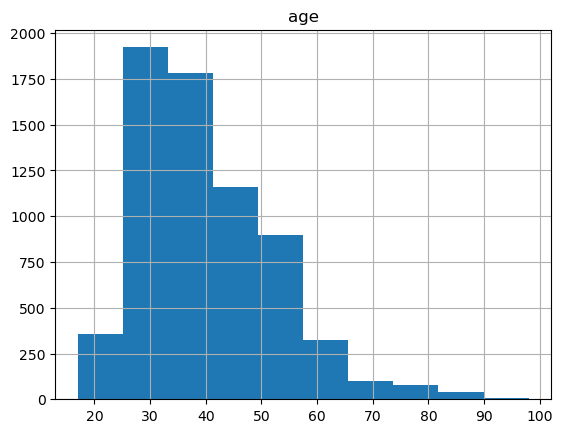

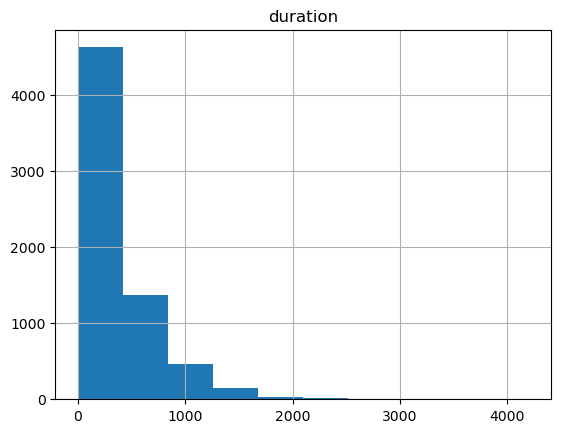

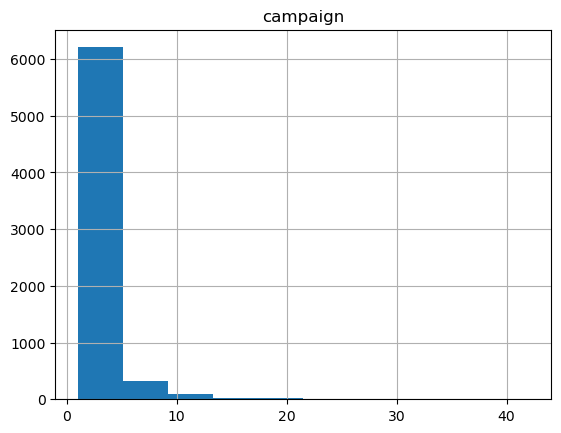

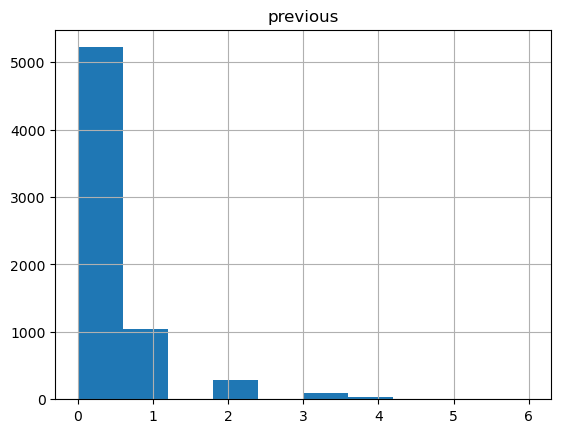

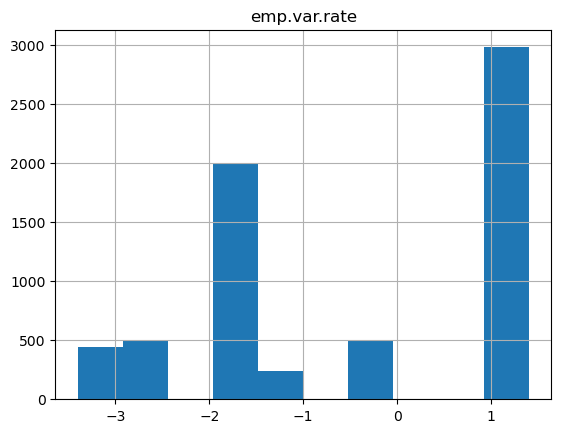

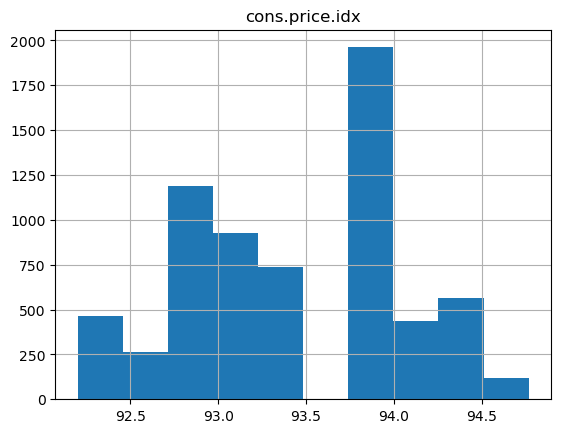

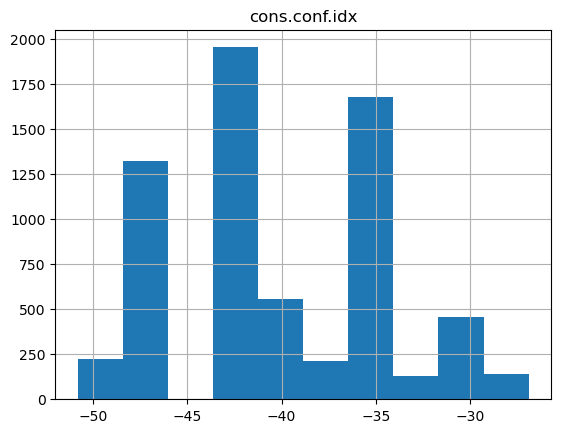

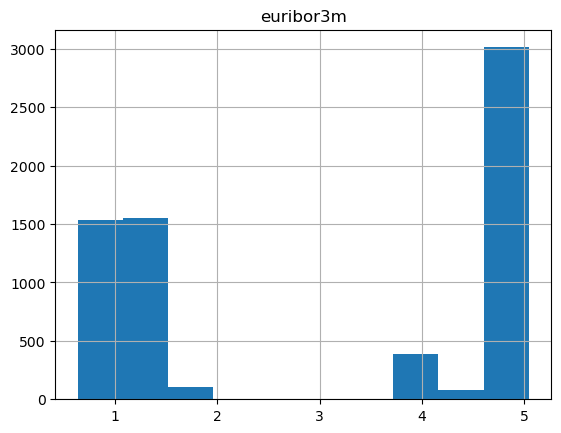

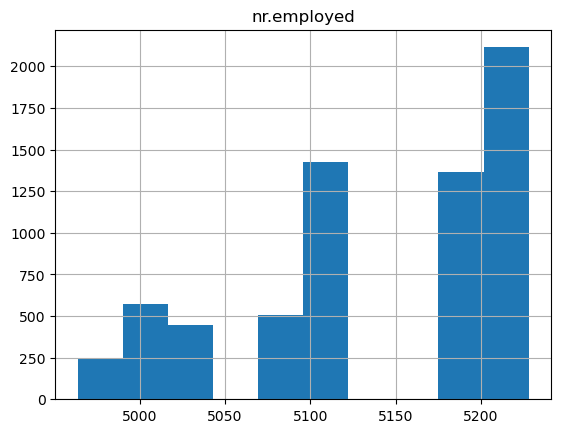

In [193]:
df.hist(column='age')
df.hist(column='duration')
df.hist(column='campaign')
df.hist(column='previous')
df.hist(column='emp.var.rate')
df.hist(column='cons.price.idx')
df.hist(column='cons.conf.idx')
df.hist(column='euribor3m')
df.hist(column='nr.employed')



As can be seen in the histograms, age, con.price.idx and cons.conf.idx follows a normal distribution. One of the features need a log normalization, this is "duration". The other ones, doesn't seem like a log normalization would improve the result, those features are campaign, previous, emp.var.rate, euribor and nr.employed

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

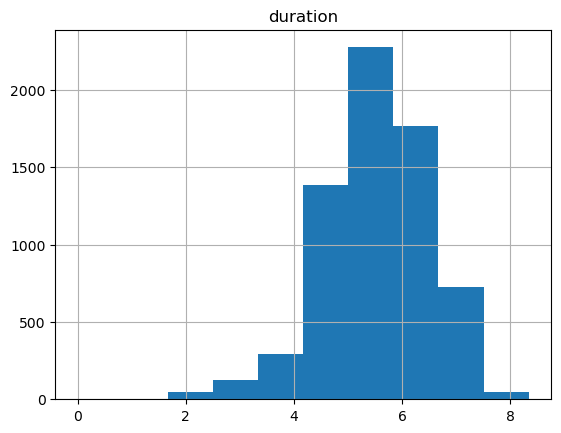

In [194]:
#Log of features that have tails
dfTest = df
dfTest['duration'] = dfTest['duration'] + 1
dfTest['duration'] = np.log(dfTest['duration'])
dfTest.hist(column='duration')

## Conclusion about Standarization or Normalization

As can be seen in the last plots, there are a considerable quantity of features that doesn't fit a normal. In consequence, normalization will be applied, and, for SVM, that usually works better with standarization, standarization will be also tested in order to see what gives better results.

In [195]:




from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
d2 = scaler.transform(df)
df2 = pd.DataFrame(d2, columns = df.columns)

df2 = df2[df2.filter(regex='^(?!Unnamed)').columns]
display(df2.iloc[: , 1:].head()) #Remove ID because is not of interest now
df2.to_csv(r'../Datasets/Normalization/training-dataset-reduced-normalized.csv')


,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,poutcome_nonexistent,poutcome_success
0,1.0,0.0,1.0,0.222222,0.75,0.721408,0.048780,1.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.444444,0.75,0.436013,0.170732,1.0,0.0,1.000000,0.669135,0.338912,0.982544,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.222222,0.25,0.680023,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.333333,0.75,0.535298,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.959420,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.333333,0.00,0.658909,0.073171,1.0,0.0,0.104167,0.296960,0.418410,0.146679,0.425709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Same columns for training and testing

In order to do the learning methods, both data sets need to have the same columns, and with One Hot Encoding, since two datasets doesn't have the same kind of values per column, One Hot Encoding created columns that doesn't exist in the other data set

In [196]:
testingDataset  = pd.read_csv(r'../Datasets/Normalization/testing-dataset-reduced-normalized.csv')
trainingDataset  = pd.read_csv(r'../Datasets/Normalization/training-dataset-reduced-normalized.csv')
testingDataset = testingDataset[testingDataset.filter(regex='^(?!Unnamed)').columns]
trainingDataset  = trainingDataset [trainingDataset .filter(regex='^(?!Unnamed)').columns]

def add_dummy_columns(dataf1, dataf2):
    cols1 = set(dataf1.columns)
    cols2 = set(dataf2.columns)
    if cols1 != cols2:
        missing_cols = list(cols1 - cols2)
        for col in missing_cols:
            dataf2[col] = 0
    return dataf2

testingDataset = add_dummy_columns(trainingDataset, testingDataset)
trainingDataset = add_dummy_columns(testingDataset, trainingDataset)

testingDataset = testingDataset[testingDataset.filter(regex='^(?!Unnamed)').columns]
trainingDataset = trainingDataset[trainingDataset.filter(regex='^(?!Unnamed)').columns]

testingDataset = testingDataset.sort_index(axis=1, kind='mergesort')
trainingDataset = trainingDataset.sort_index(axis=1, kind='mergesort')

display(testingDataset.head())
display(trainingDataset.head())


testingDataset.to_csv(r'../Datasets/Normalization/testing-dataset-reduced-normalized-sameColumns.csv')
trainingDataset.to_csv(r'../Datasets/Normalization/training-dataset-reduced-normalized-sameColumns.csv')

,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default_unknown,default_yes,duration,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,emp.var.rate,euribor3m,housing,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan,marital_married,marital_single,marital_unknown,month,nr.employed,pdays,poutcome_nonexistent,poutcome_success,previous,y
0,0.104478,0.129032,0.154812,0.340608,0.0,0.0,0.0,0,0.072591,0.0,0.0,0.0,0,0.0,1.0,0.0,0.333333,0.174603,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.512287,1.0,1.0,0.0,0.0,1.0
1,0.238806,0.000000,0.192469,0.269680,0.0,1.0,0.0,0,0.016927,0.0,0.0,1.0,0,0.0,0.0,0.0,0.333333,0.153741,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.222222,0.512287,1.0,1.0,0.0,0.0,0.0
2,0.611940,0.000000,0.602510,0.698753,1.0,0.0,1.0,0,0.006510,0.0,0.0,0.0,0,0.0,0.0,0.0,0.937500,0.957370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
3,0.343284,0.032258,0.192469,0.269680,0.0,1.0,1.0,0,0.035807,0.0,0.0,0.0,0,0.0,1.0,0.0,0.333333,0.153741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222222,0.512287,1.0,1.0,0.0,0.0,0.0
4,0.462687,0.000000,0.602510,0.698753,1.0,1.0,0.0,0,0.043294,0.0,0.0,1.0,0,0.0,0.0,0.0,0.937500,0.956916,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0


,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default_unknown,default_yes,duration,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,emp.var.rate,euribor3m,housing,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan,marital_married,marital_single,marital_unknown,month,nr.employed,pdays,poutcome_nonexistent,poutcome_success,previous,y
0,0.419753,0.048780,0.602510,0.698753,1.0,0.75,0.0,0.0,0.721408,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.937500,0.958059,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
1,0.246914,0.170732,0.338912,0.669135,0.0,0.75,0.0,0.0,0.436013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.982544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.444444,1.000000,1.0,1.0,0.0,0.0,0.0
2,0.185185,0.000000,0.602510,0.698753,1.0,0.25,1.0,0.0,0.680023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.937500,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
3,0.407407,0.000000,0.376569,0.882307,1.0,0.75,0.0,0.0,0.535298,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.959420,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,1.000000,1.0,1.0,0.0,0.0,0.0
4,0.370370,0.073171,0.418410,0.296960,0.0,0.00,0.0,0.0,0.658909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.104167,0.146679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.425709,1.0,1.0,0.0,0.0,1.0
